# Image Alignment
**Satya Mallick, LearnOpenCV.com**

## Align an image to a template.
![alt text](https://learnopencv.com/wp-content/uploads/2023/03/opencv_bootcamp_08_image-alignment-using-opencv.jpg "Image Alignment")

## Theory

1. A **Homography** transforms a square to arbitrary quad.

![alt text](https://learnopencv.com/wp-content/uploads/2023/03/opencv_bootcamp_08_motion-models.jpg "Motion Models")

## Theory

2. Images of two planes are related by a **Homography**
3. We need **4 corresponding points** to estimate Homography


!["Homography Example"](https://learnopencv.com/wp-content/uploads/2023/03/opencv_bootcamp_08_homography-example.jpg)

In [1]:
# Imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

%matplotlib inline

##  <font style="color:black">Download Assets</font>

In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [8]:
URL = r"https://www.dropbox.com/s/zuwnn6rqe0f4zgh/opencv_bootcamp_assets_NB8.zip?dl=1"

print(os.getcwd())
asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB8.zip")
print(asset_zip_path)
print(os.listdir())
# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

/content
/content/opencv_bootcamp_assets_NB8.zip
['.config', 'scanned-form.jpg', 'form.jpg', 'opencv_bootcamp_assets_NB8.zip', 'sample_data']


Text(0.5, 1.0, 'harris Form')

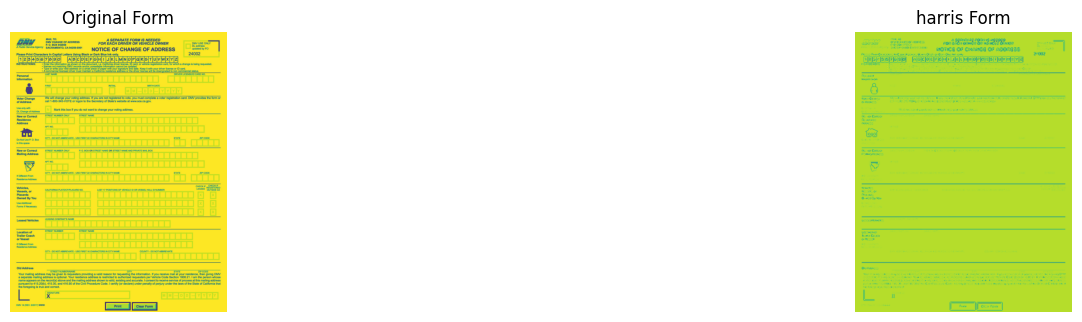

In [2]:
# tempImage1=cv2.imread("checkerboard_84x84.jpg")
tempImage1=cv2.imread("form.jpg")
tempImageGray=cv2.cvtColor(tempImage1,cv2.COLOR_BGR2GRAY)

tempImage2=cv2.cornerHarris(tempImageGray,3,3,0.21)

plt.figure(figsize=(20,8))
plt.subplot(221); plt.axis('off'); plt.imshow(tempImageGray); plt.title("Original Form")
plt.subplot(222); plt.axis('off'); plt.imshow(tempImage2); plt.title("harris Form")




## Step 1: Read Template and Scanned Image

In [3]:
# Read reference image
refFilename = "form.jpg"
print("Reading reference image:", refFilename)
im1 = cv2.imread(refFilename, cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

# Read image to be aligned
imFilename = "scanned-form.jpg"
print("Reading image to align:", imFilename)
im2 = cv2.imread(imFilename, cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

Reading reference image: form.jpg
Reading image to align: scanned-form.jpg


(< cv2.KeyPoint 0x7529f5dd90e0>, < cv2.KeyPoint 0x7529f5ee9500>, < cv2.KeyPoint 0x752a342edf50>, < cv2.KeyPoint 0x752a342ee370>, < cv2.KeyPoint 0x7529f5fbc9c0>, < cv2.KeyPoint 0x7529f5fff510>, < cv2.KeyPoint 0x7529f5fff540>, < cv2.KeyPoint 0x7529f60a73f0>, < cv2.KeyPoint 0x7529f60a4ff0>, < cv2.KeyPoint 0x7529f5dea850>, < cv2.KeyPoint 0x7529f5dea8e0>, < cv2.KeyPoint 0x7529f5de9650>, < cv2.KeyPoint 0x7529f5e19020>, < cv2.KeyPoint 0x7529f5e191a0>, < cv2.KeyPoint 0x7529f5e191d0>, < cv2.KeyPoint 0x7529f5e19200>, < cv2.KeyPoint 0x7529f5e19230>, < cv2.KeyPoint 0x7529f5e19260>, < cv2.KeyPoint 0x7529f5e19590>, < cv2.KeyPoint 0x7529f5e19380>, < cv2.KeyPoint 0x7529f5e195c0>, < cv2.KeyPoint 0x7529f5e195f0>, < cv2.KeyPoint 0x7529f5e19620>, < cv2.KeyPoint 0x7529f5e19650>, < cv2.KeyPoint 0x7529f5e19680>, < cv2.KeyPoint 0x7529f5e196b0>, < cv2.KeyPoint 0x7529f5e196e0>, < cv2.KeyPoint 0x7529f5e19710>, < cv2.KeyPoint 0x7529f5e19740>, < cv2.KeyPoint 0x7529f5e19770>, < cv2.KeyPoint 0x7529f5e197a0>, < cv2.K

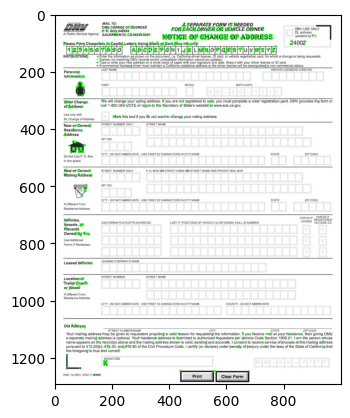

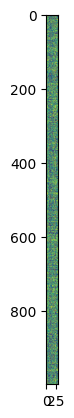

(<matplotlib.image.AxesImage at 0x7529f5f15bb0>, None)

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread("form.jpg", cv2.IMREAD_GRAYSCALE)

# Create an ORB object with default parameters
orb = cv2.ORB_create(1000)

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(img, None)

print(keypoints)
print(type(descriptors))




# Draw keypoints on the image
img_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), color=(0,255,0), flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# Display the image (example using matplotlib)
plt.imshow(img_keypoints), plt.show()

plt.imshow(descriptors), plt.show()



Text(0.5, 1.0, 'Scanned Form')

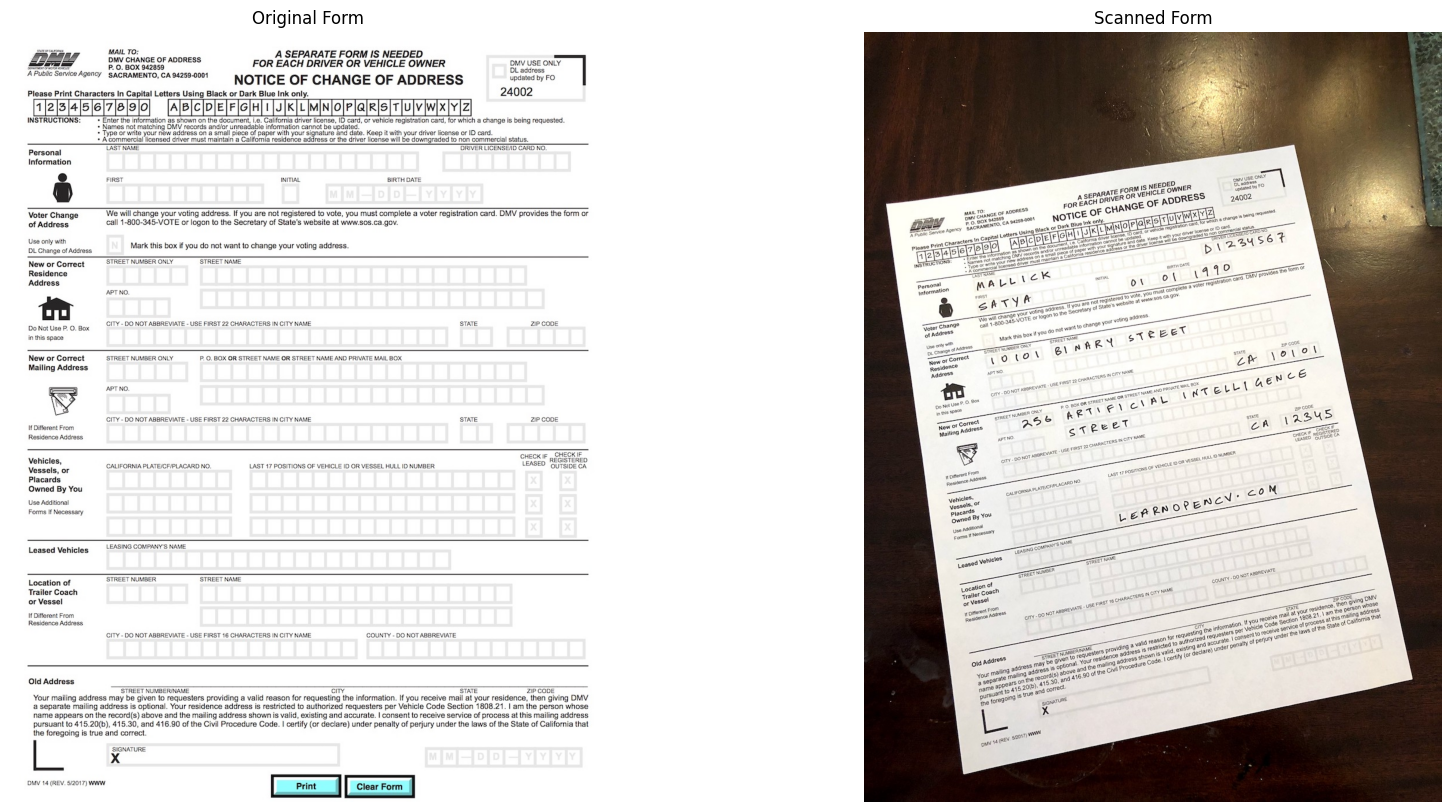

In [5]:
# Display Images

plt.figure(figsize=[20, 10]);
plt.subplot(121); plt.axis('off'); plt.imshow(im1); plt.title("Original Form")
plt.subplot(122); plt.axis('off'); plt.imshow(im2); plt.title("Scanned Form")

## Step 2: Find keypoints in both Images

Think of keypoints as corner points that are stable under image transformations

In [14]:
# Convert images to grayscale
im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)


# Detect ORB features and compute descriptors.
MAX_NUM_FEATURES = 1000
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray, None)

print(keypoints1[match.queryIdx].pt)
print(keypoints1[match.trainIdx].pt)
# Display
im1_display = cv2.drawKeypoints(im1, keypoints1, outImage=np.array([]),
                                color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

im2_display = cv2.drawKeypoints(im2, keypoints2, outImage=np.array([]),
                                color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

(546.4352416992188, 319.5003662109375)
(107.0, 936.0)


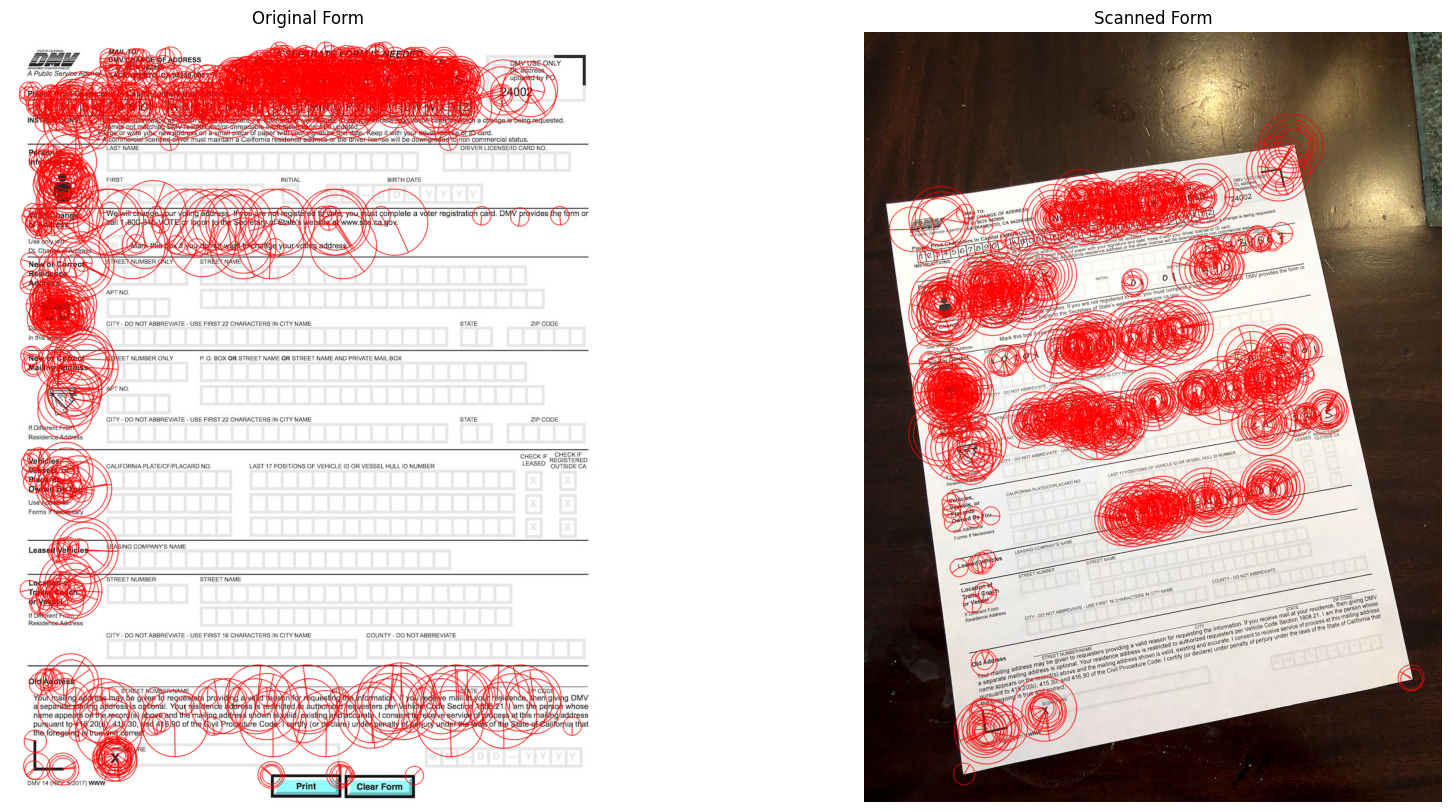

In [7]:
plt.figure(figsize=[20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title("Original Form");
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title("Scanned Form");

## Step 3 : Match keypoints in the two image

In [9]:
# Match features.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

# Converting to list for sorting as tuples are immutable objects.
matches = list(matcher.match(descriptors1, descriptors2, None))
print("matches before the sorting ",matches)
# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)
print("matches after sorting them ",matches)

# Remove not so good matches
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]

matches before the sorting  [< cv2.DMatch 0x7529f5bf0910>, < cv2.DMatch 0x7529f5bf1f70>, < cv2.DMatch 0x7529f5bf2bf0>, < cv2.DMatch 0x7529f5bf2710>, < cv2.DMatch 0x7529f5bf1a70>, < cv2.DMatch 0x7529f5bf2e50>, < cv2.DMatch 0x7529f5bf1d50>, < cv2.DMatch 0x7529f5bf21d0>, < cv2.DMatch 0x7529f5bf2730>, < cv2.DMatch 0x7529f5bf0bf0>, < cv2.DMatch 0x7529f5bf3230>, < cv2.DMatch 0x7529f5bf3ad0>, < cv2.DMatch 0x7529f5bf1210>, < cv2.DMatch 0x7529f5bf2270>, < cv2.DMatch 0x7529f5bf04b0>, < cv2.DMatch 0x7529f5bf2cf0>, < cv2.DMatch 0x7529f5bf2ed0>, < cv2.DMatch 0x7529f5bf2f90>, < cv2.DMatch 0x7529f5bf14d0>, < cv2.DMatch 0x7529f5bf0510>, < cv2.DMatch 0x7529f5bf03f0>, < cv2.DMatch 0x7529f5bf1f90>, < cv2.DMatch 0x7529f5bf0410>, < cv2.DMatch 0x7529f5bf2930>, < cv2.DMatch 0x7529f5bf37f0>, < cv2.DMatch 0x7529f5bf2630>, < cv2.DMatch 0x7529f5bf2290>, < cv2.DMatch 0x7529f5bf02f0>, < cv2.DMatch 0x7529f5bf02b0>, < cv2.DMatch 0x7529f5bf0130>, < cv2.DMatch 0x7529f5bf3890>, < cv2.DMatch 0x7529f5bf2fd0>, < cv2.DMatc

Text(0.5, 1.0, 'Original Form')

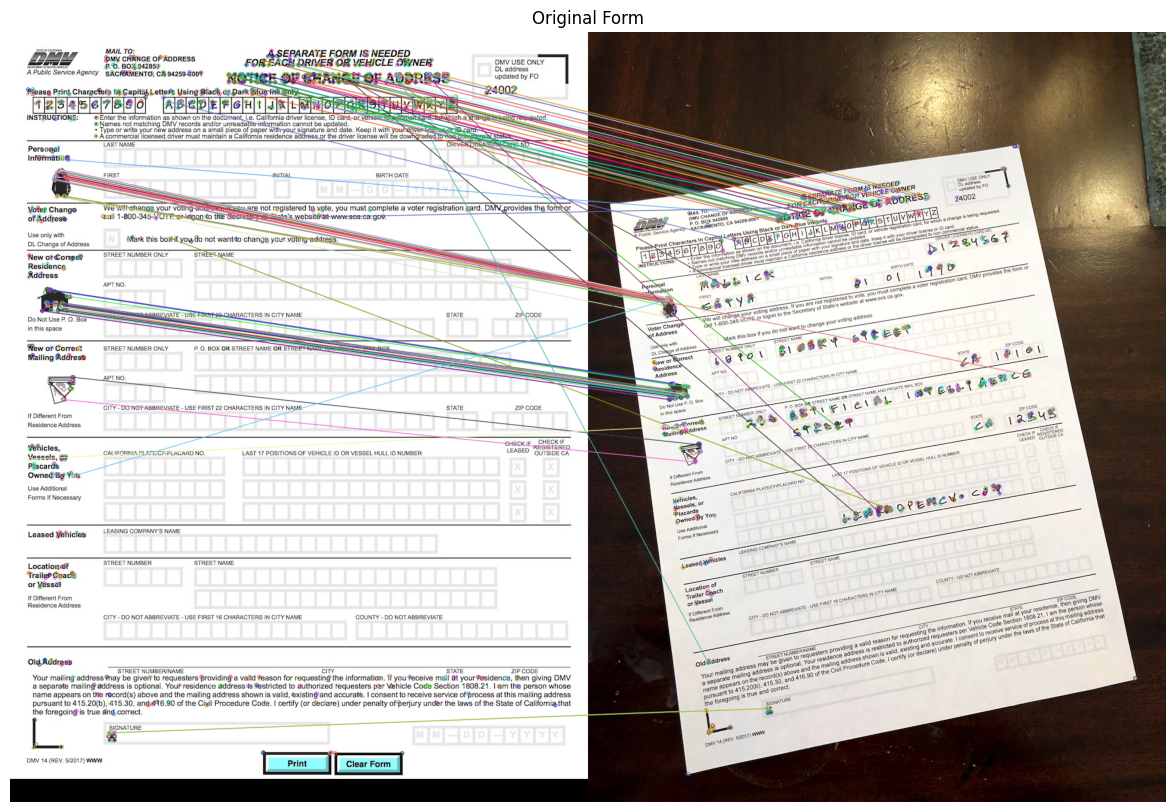

In [10]:
# Draw top matches
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)

plt.figure(figsize=[40, 10])
plt.imshow(im_matches);plt.axis("off");plt.title("Original Form")

## Step 4:  Find Homography



In [12]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)
print(len(points2))

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)
print(h,"\t Mask Image ",mask)

100
[[ 1.42472237e+00 -2.04167047e-01 -9.12228912e+00]
 [ 2.28816577e-01  1.55453135e+00 -4.93647983e+02]
 [-4.44021186e-05  1.57776527e-04  1.00000000e+00]] 	 Mask Image  [[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]]


## Step 5: Warp image

Text(0.5, 1.0, 'Scanned Form')

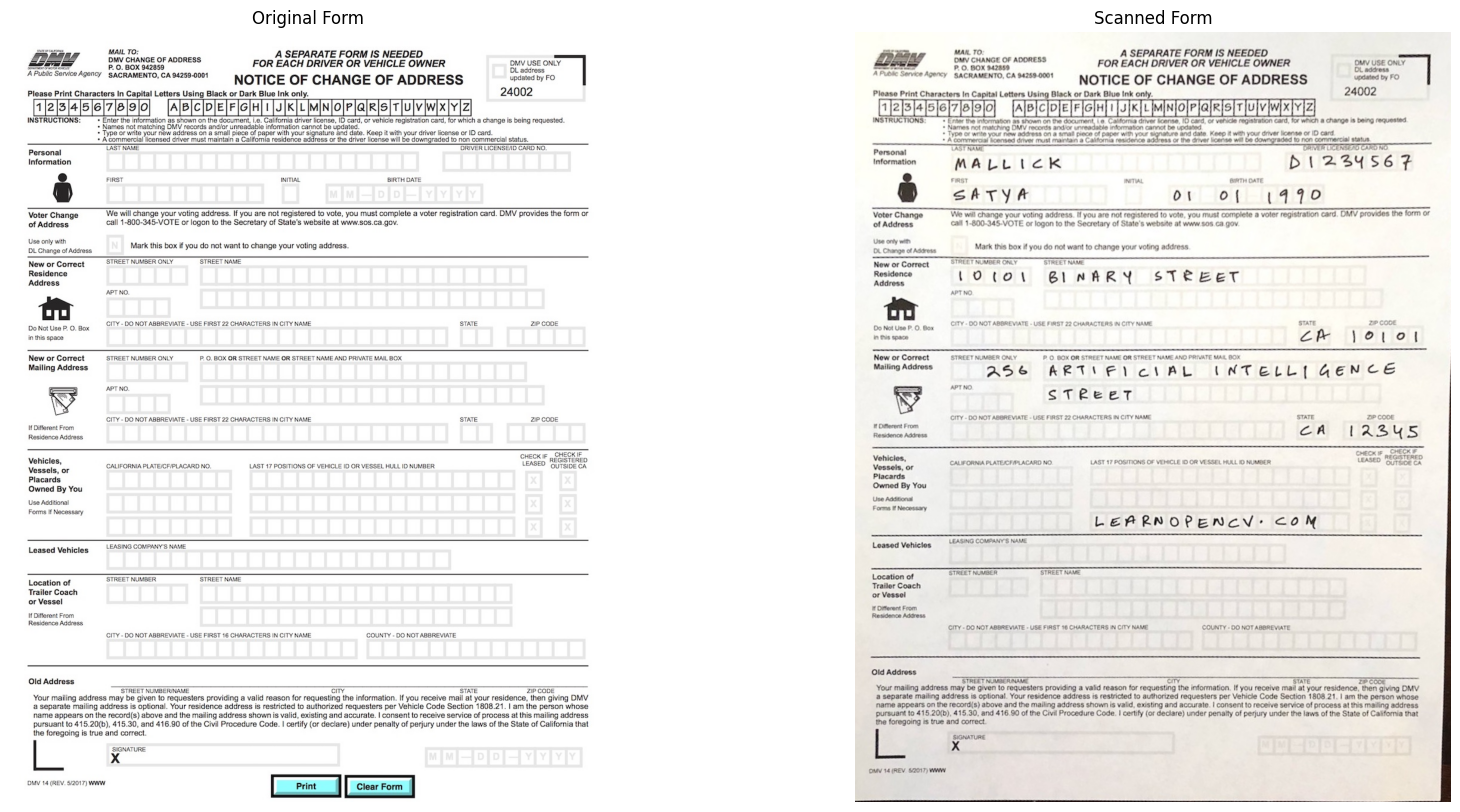

In [15]:
# Use homography to warp image
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))

# Display results
plt.figure(figsize=[20, 10])
plt.subplot(121);plt.imshow(im1);    plt.axis("off");plt.title("Original Form")
plt.subplot(122);plt.imshow(im2_reg);plt.axis("off");plt.title("Scanned Form")

run and change by 
# Muhammad Uzair
ThankYOU